In [6]:
import numpy

Omega = [1.0]
Omega = numpy.array(Omega, dtype=numpy.complex)
Omega

array([ 1.+0.j])

In [10]:
numpy.apply_along_axis?

In [9]:
Omega.reshape(1,1)

array([[ 1.+0.j]])

In [17]:
import numpy
a = numpy.zeros((5,5,3))

for i in range(5):
    for j in range(5):
        a[i,j] = [100*i + 10*j + 0, 100*i + 10*j + 1, 100*i + 10*j + 2]
        
numpy.reshape(a.flatten(),a.shape) == a

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]]], dtype=bool)

In [2]:
import numpy
import scipy
import networkx
import matplotlib.pyplot as plt

Generating Random Clusters
==========================

In [3]:
from numpy import sqrt
from numpy.random import randn
    
def random_cluster_normal(mean, var, n, dim):
    # make sure input data is of appropriate dimension
    mean = numpy.array(mean)
    var = numpy.array(var)
    assert len(mean) == dim
    assert len(var) == dim
    
    # generate row-vectors of normal data
    data = randn(n,dim)
    
    # scale and shift (look at rules for adding vectors to matrices)
    data = mean + sqrt(var)*data
    return data

In [8]:
C1 = random_cluster_normal([0,0],[0.4,0.1],64,2)
C2 = random_cluster_normal([3,0],[0.2,0.1],64,2)
C3 = random_cluster_normal([0,3],[0.5,0.5],64,2)

all_data = numpy.append(C1, C2, axis=0)
all_data = numpy.append(all_data, C3, axis=0)
print all_data.shape

(192, 2)


(-2.0, 5.0, -1.0, 5.0)

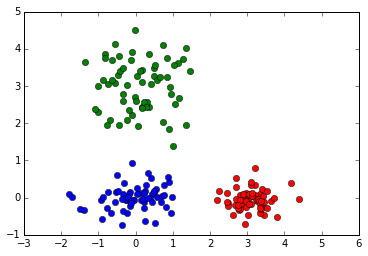

In [9]:
%matplotlib inline

plt.plot(C1[:,0], C1[:,1], 'bo')
plt.hold(True)
plt.plot(C2[:,0], C2[:,1], 'ro')
plt.plot(C3[:,0], C3[:,1], 'go')

plt.axis('equal')

Heirarchical
============

Defining Within Cluster Variation
=================================

In [10]:
from numpy.linalg import norm

def within_cluster_squared_euclidean(cluster):
    N = len(cluster)
    dist = 0
    
    # Todo: there has to be a fast, numpy way of doing this
    for i in range(N):
        for ii in range(i):
            dist += norm(cluster[i] - cluster[ii], 2)
    dist /= N
    return dist

W = within_cluster_squared_euclidean

In [11]:
print W(C1)
print W(C2)
print W(all_data)

26.8638152339
18.5834991578
256.301826025


K-Means Clustering
==================

In [12]:
# begin by randomly assigning cluster indices
# for the data

K = 3  # number of clusters
N = len(all_data)  # total number of data points
cluster_indices = numpy.random.randint(0,K,size=N)

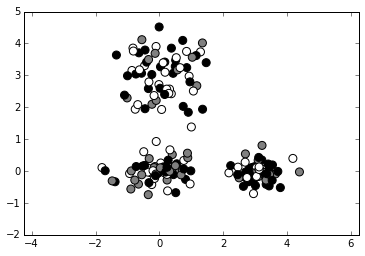

In [13]:
%matplotlib inline

colors = ['b', 'r']
plt.scatter(all_data[:,0], all_data[:,1], c=cluster_indices, s=64)
plt.axis('equal')
plt.gray()

In [14]:
from numpy import mean, argmin

num_iters = 100

for _ in range(num_iters):
    # compute the centroids of each cluster
    centroids = numpy.array([mean(all_data[cluster_indices==k], axis=0) for k in range(K)])
    
    # assign to each observation to the cluster whose centroid is closest
    for n in range(N):
        datum = all_data[n]
        distances = numpy.apply_along_axis(lambda centroid: norm(centroid - datum), 1, centroids)
        cluster_indices[n] = argmin(distances)

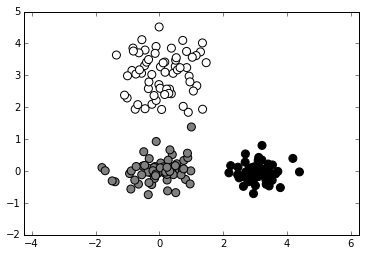

In [15]:
%matplotlib inline

colors = ['b', 'r']
plt.scatter(all_data[:,0], all_data[:,1], c=cluster_indices, s=64)
plt.axis('equal')
plt.gray()

(-3.0, 5.0, -2.0, 5.0)

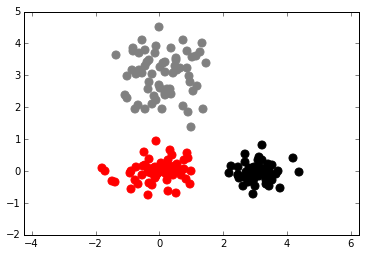

In [16]:
%matplotlib inline

plt.scatter(C1[:,0], C1[:,1], color='red', s=64)
plt.hold(True)
plt.scatter(C2[:,0], C2[:,1], color='black', s=64)
plt.scatter(C3[:,0], C3[:,1], color='gray', s=64)
plt.axis('equal')